<a href="https://colab.research.google.com/github/Rabiya-k/SVM/blob/Image-Classification/MLTASK_SVM_IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title : Image Classification Using svm(Support Vector Machine).**

## **Problem Description**
## In this project, your task is to identify the given set of images of dogs, cats, horses and humans, then classify each image belongs to which class and predict a new image belongs to wich class using SVM(Support Vector Machine).

### Import required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os  #operating system. It allows you to perform various operations related to file
           #and directory manipulation, system-related tasks, and environment variables.

from skimage.transform import resize
from skimage.io import imread
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

### Load the image and convert it to a data frame

In [ ]:
categories = ['cat', 'dog', 'horse','human']
flat_data_arr = []    #input array
target_arr = []       #Output array
#path which contains all the categories of images
datadir = '/content/drive/MyDrive/Datasets/Images/Images'

for i in categories:

    print(f'Loading... Category : {i}')
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(categories.index(i))
    print(f'Loaded... Category :{i} Successfully')
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)


Loading... Category : cat
Loaded... Category :cat Successfully
Loading... Category : dog
Loaded... Category :dog Successfully
Loading... Category : horse
Loaded... Category :horse Successfully
Loading... Category : human
Loaded... Category :human Successfully


### A list of ‘Categories’ is defined to represent the image categories that will be used for training the machine learning model. Two empty arrays are created to store the image data and their corresponding labels. The images are then loaded from the specified path, read and resized to a fixed size of 150×150 pixels with 3 color channels, and flattened to a 1D array. The flattened image data and its corresponding label (0 for 'cats', 1 for 'dogs', 2 for 'horses' and 3 for 'humans') are added to the arrays.The arrays are converted to a pandas DataFrame.

In [ ]:
#Data Frame
df = pd.DataFrame(flat_data)
df['Target'] = target
df.shape

(818, 67501)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.988235,0.972549,0.874510,0.988235,0.972467,0.874675,0.988235,0.968834,0.881941,0.988247,...,0.973706,0.966366,0.866882,0.971375,0.964187,0.864184,0.962075,0.958043,0.848570,0
1,0.899591,0.907434,0.903512,0.901118,0.908961,0.905039,0.897848,0.905691,0.901770,0.896510,...,0.531648,0.560565,0.444037,0.560161,0.589060,0.465449,0.562671,0.602316,0.492241,0
2,0.140338,0.125163,0.117117,0.191357,0.179378,0.154739,0.170147,0.158381,0.123947,0.158284,...,0.746079,0.746079,0.746079,0.740204,0.739787,0.740413,0.731390,0.724575,0.734798,0
3,0.258682,0.201128,0.214404,0.224390,0.171584,0.183607,0.201301,0.154361,0.171906,0.218070,...,0.140650,0.088461,0.140874,0.312664,0.264655,0.285891,0.777695,0.734112,0.728475,0
4,0.345098,0.329412,0.286275,0.345098,0.329412,0.286275,0.345164,0.329478,0.286341,0.351347,...,0.414056,0.390526,0.327781,0.418693,0.395164,0.332418,0.417806,0.396440,0.331531,0


### Separate input features and targets.

In [ ]:
#Separate input and out features from the newly created dataframe

#input data
X = df.iloc[:,:-1]
#Output data
y = df.iloc[:,-1]

In [ ]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.988235,0.972549,0.874510,0.988235,0.972467,0.874675,0.988235,0.968834,0.881941,0.988247,...,0.874794,0.973706,0.966366,0.866882,0.971375,0.964187,0.864184,0.962075,0.958043,0.848570
1,0.899591,0.907434,0.903512,0.901118,0.908961,0.905039,0.897848,0.905691,0.901770,0.896510,...,0.481043,0.531648,0.560565,0.444037,0.560161,0.589060,0.465449,0.562671,0.602316,0.492241
2,0.140338,0.125163,0.117117,0.191357,0.179378,0.154739,0.170147,0.158381,0.123947,0.158284,...,0.738695,0.746079,0.746079,0.746079,0.740204,0.739787,0.740413,0.731390,0.724575,0.734798
3,0.258682,0.201128,0.214404,0.224390,0.171584,0.183607,0.201301,0.154361,0.171906,0.218070,...,0.238904,0.140650,0.088461,0.140874,0.312664,0.264655,0.285891,0.777695,0.734112,0.728475
4,0.345098,0.329412,0.286275,0.345098,0.329412,0.286275,0.345164,0.329478,0.286341,0.351347,...,0.332918,0.414056,0.390526,0.327781,0.418693,0.395164,0.332418,0.417806,0.396440,0.331531


In [ ]:
y.tail(5)

813    3
814    3
815    3
816    3
817    3
Name: Target, dtype: int64

In [ ]:
#Separate input features and targets.
#Splitting the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=77, stratify=y)

### Build and train the model
Here the model is a Support vector machine

In [ ]:
# Creating a support vector classifier
model = svm.SVC(kernel='rbf')

In [ ]:
# Training the model using the training data
model.fit(X_train,y_train)

SVC()

### Model evaluation
Now the model is tested using testing data in this way model.predict() and the accuracy of the model can be calculated using the accuracy_score() method from sklearn.metrics

In [ ]:
# Testing the model using the testing data
y_pred = model.predict(X_test)

y_pred


array([2, 2, 0, 1, 1, 3, 2, 0, 0, 1, 0, 1, 2, 3, 2, 1, 0, 2, 2, 3, 1, 2,
       1, 3, 1, 0, 3, 1, 2, 3, 1, 3, 0, 1, 0, 1, 0, 3, 3, 0, 2, 0, 2, 2,
       1, 0, 1, 3, 1, 1, 3, 3, 3, 2, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 3, 2,
       1, 3, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 0, 2, 3, 0, 2, 3, 0, 3, 0, 0,
       0, 2, 2, 1, 3, 3, 3, 1, 3, 2, 2, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0,
       3, 2, 2, 2, 2, 0, 1, 3, 1, 0, 3, 3, 1, 2, 3, 3, 2, 1, 2, 1, 0, 2,
       3, 0, 1, 3, 1, 2, 0, 3, 1, 2, 1, 3, 3, 1, 0, 3, 3, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 2, 2, 3, 3, 2, 0])

In [ ]:
# Calculating the accuracy of the model

accuracy = accuracy_score(y_pred, y_test)

In [ ]:
# Print the accuracy of the model

print(f'The model is {accuracy*100,2}% accurate')

The model is (64.02439024390245, 2)% accurate


In [ ]:
#Classification report

print(classification_report(y_test, y_pred, target_names=['cat', 'dog', 'horse', 'human']))

              precision    recall  f1-score   support

         cat       0.60      0.49      0.54        43
         dog       0.53      0.61      0.57        41
       horse       0.75      0.82      0.79        40
       human       0.68      0.65      0.67        40

    accuracy                           0.64       164
   macro avg       0.64      0.64      0.64       164
weighted avg       0.64      0.64      0.64       164



### Prediction
Now we will give a new image to our model and it will predict whether the given image is of cat or dog or horse or human

Predicted class is:  [0]
The predicted image is :cat


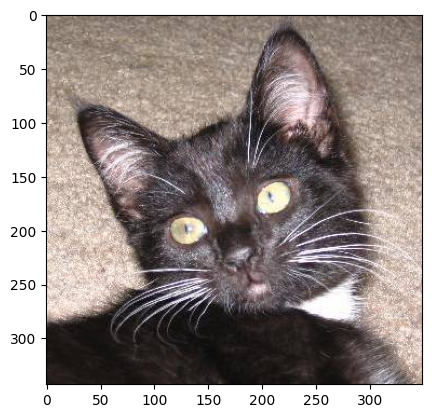

In [ ]:
new_img_path = '/content/drive/MyDrive/Datasets/Images/Images/cat/cat.102.jpg'
new_img = imread(new_img_path)
img_resize = resize(new_img, (150,150,3))
flat_img = [img_resize.flatten()]
predicted_class = model.predict(flat_img)

print('Predicted class is: ',predicted_class)
print('The predicted image is :'+categories[predicted_class[0]])
plt.imshow(new_img)
plt.show()

Predicted class is:  [2]


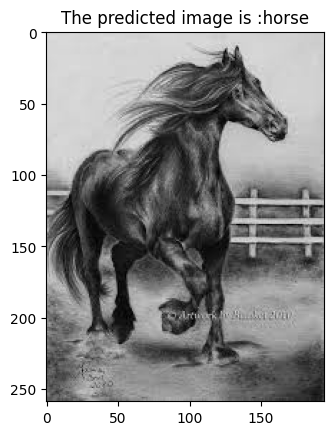

Predicted class is:  [0]


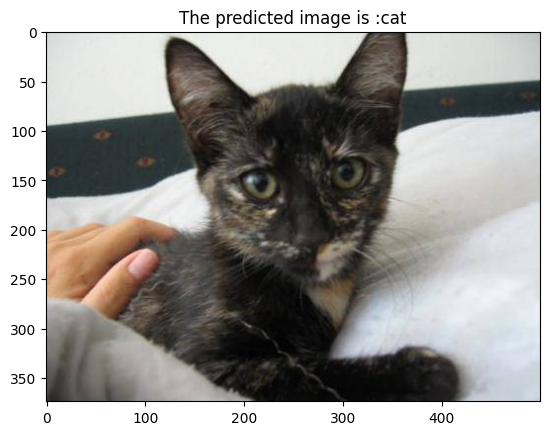

Predicted class is:  [1]


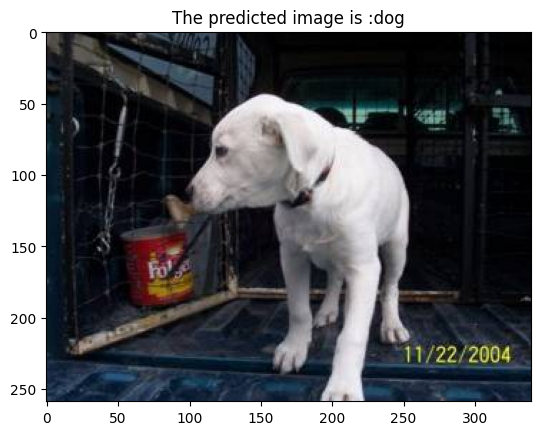

Predicted class is:  [3]


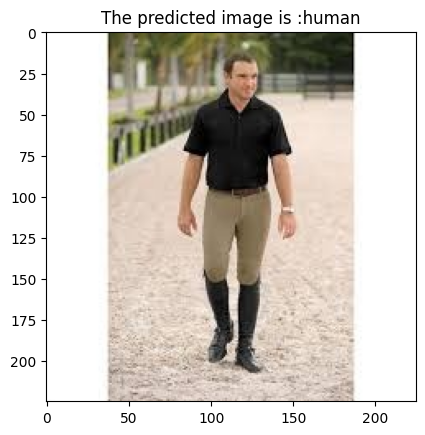

In [ ]:
#predict the list of some images
new_images_path =['/content/drive/MyDrive/Datasets/Images/Images/horse/horse-105.jpg','/content/drive/MyDrive/Datasets/Images/Images/cat/cat.109.jpg',
                  '/content/drive/MyDrive/Datasets/Images/Images/dog/dog.154.jpg','/content/drive/MyDrive/Datasets/Images/Images/human/rider-132.jpg']

for img in new_images_path:
  new_images = imread(img)
  img_resize = resize(new_images, (150,150,3))
  flat_img = [img_resize.flatten()]
  predicted_class = model.predict(flat_img)

  print('Predicted class is: ', predicted_class)
  plt.title('The predicted image is :'+categories[predicted_class[0]])
  plt.imshow(new_images)
  plt.show()


### Our model has an accuracy of 0.64, which means it correctly classified 64% of the images in the test set. The F1-score for the classes is between 0.54, 0.57, 0.79 and 0.67 which suggests that the model’s performance is moderate.